In [ ]:
import numpy as np
import random
import copy
import matplotlib.pyplot as plt

In [6]:
class Problem:
    def __init__(self):
        pass


In [7]:
def decode(chromosome, problem: Problem):
    pass

def get_fitness(x):
    pass

In [ ]:
class Individual:
    def __init__(self):
        self.chromosome = None
        self.fitness = None

    def gen_indi(self, problem : Problem):
        self.chromosome = np.random.uniform(0.0, 1.0, 10)
        # pass
    
    def cal_fitness(self, problem):
        self.fitness = get_fitness(self.chromosome)
    
    def clone(self):
        return copy.deepcopy(self)
    
    def __repr__(self):
        return f"chromosome={self.chromosome}, fitness={self.fitness}" 
 

In [2]:
# Simulated binary crossover - SBX
def crossover(parent1, parent2, eta = 2.0):
    off1 = Individual()
    off2 = Individual()
    r = np.random.rand()
    if (r <= 0.5):
        beta = (2*r)**(1.0/(eta + 1))
    else:
        beta = (1.0/(2*(1 - r)))**(1.0/(eta + 1))
    p1 = parent1.chromosome
    p2 = parent2.chromosome
    c1 = 0.5 * ((1 + beta) * p1 + (1 - beta) * p2)
    c2 = 0.5 * ((1 - beta) * p1 + (1 + beta) * p2)
    c1 = np.clip(c1, 0.0, 1.0)
    c2 = np.clip(c2, 0.0, 1.0)
    off1.chromosome = c1
    off2.chromosome = c2
    return off1.clone(), off2.clone()

In [3]:
# Polynomial mutaion - PM
def mutation(individual, eta = 20.0):
    indi = individual.clone()
    chr = indi.chromosome
    for i in range(chr.size):
        mu = np.random.rand()
        if (mu <= 0.5):
            delta = (2 * mu)**(1.0/(1 + eta)) - 1
            chr[i] = chr[i] + delta * chr[i]
        else:
            delta = 1 - (2 - 2*mu)**(1.0/(1 + eta))
            chr[i] = chr[i] + delta * (1 - chr[i])
            
    chr = np.clip(chr, 0.0, 1.0)
    indi.chromosome = chr
    return indi.clone()

In [ ]:
class Population:
    def __init__(self, pop_size, problem : Problem):
        self.pop_size = pop_size
        self.list_indi = []
        self.problem = problem
    
    def genPop(self):
        for i in range(self.pop_size):
            indi = Individual()
            indi.gen_indi(self.problem)
            indi.cal_fitness(self.problem)
            self.list_indi.append(indi)

    def __repr__(self):
        pass

In [292]:
def selection(list, k = 2):
    tour1 = random.sample(list, k)
    tour2 = random.sample(list, k)
    x = max(tour1, key=lambda indi: indi.fitness)
    y = max(tour2, key=lambda indi: indi.fitness)
    return x.clone(), y.clone()

In [293]:
def survival_selection(list, pop_size):
    list = sorted(list, key=lambda indi: indi.fitness, reverse=True)
    list = list[0: pop_size]
    return list

In [294]:
def GA(problem, pop_size, max_gen, p_c, p_m):
    pop = Population(pop_size, problem)
    pop.genPop()
    history = []
    for i in range(max_gen):
        child = []
        while (len(child) < pop_size):
            p1, p2 = selection(pop.list_indi)
            if np.random.rand() <= p_c:
                c1, c2 = crossover(p1, p2, problem)
                c1.cal_fitness(problem)
                c2.cal_fitness(problem)
                child.append(c1)
                child.append(c2)
            if np.random.rand() <= p_m:
                p1 = mutation(p1)
                p2 = mutation(p2)
                p1.cal_fitness(problem)
                p2.cal_fitness(problem)
                child.append(p1)
                child.append(p2)
        pop.list_indi = survival_selection(pop.list_indi + child, pop_size)
        history.append(pop.list_indi[0].fitness)
    solution = pop.list_indi[0]
    return history, solution


In [295]:
# setup
problem = Problem()

pop_size = 200
max_gen = 2000
Pc = 0.9
Pm = 0.2

# start
fitness_history, solution = GA(problem, pop_size, max_gen, Pc, Pm)

#show
for i in range(len(fitness_history)):
    print(f"Generation {i}, bestfitness = {fitness_history[i]:.2f}")


In [ ]:
#show
np.set_printoptions(precision=2, suppress=True)
print("solution:")
print(decode(solution.chromosome, problem))
print(f"{solution.fitness:.2f}")

In [ ]:
generations = list(range(len(fitness_history)))
plt.figure(figsize=(10, 5))
plt.plot(generations, fitness_history, marker='o', linestyle='-', color='b', label='Best Fitness')

plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Fitness Progress Over Generations")
plt.legend()
plt.grid(True)
plt.show()

### Ý nghĩa của hệ số eta trong lai ghép và đột biến

#### Trong lai ghép

Thay đổi giá trị eta để xem kết quả

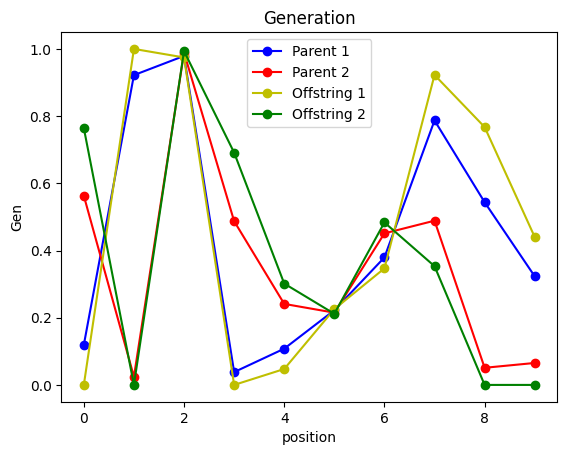

In [ ]:
#parents
p1 = Individual()
p2 = Individual()
p1.gen_indi(Problem())
p2.gen_indi(Problem())

#cossover
off1, off2 = crossover(p1, p2, eta=0.0)

#show
plt.plot(range(len(p1.chromosome)), p1.chromosome, marker='o', linestyle='-', color='b', label='Parent 1')
plt.plot(range(len(p2.chromosome)), p2.chromosome, marker='o', linestyle='-', color='r', label='Parent 2')
plt.plot(range(len(off1.chromosome)), off1.chromosome, marker='o', linestyle='-', color='y', label='Offstring 1')
plt.plot(range(len(off2.chromosome)), off2.chromosome, marker='o', linestyle='-', color='g', label='Offstring 2')

plt.xlabel('position')
plt.ylabel('Gen')
plt.title('Generation')
plt.legend()
plt.show()

#### Trong đột biến

Thay đổi giá trị eta để xem kết quả

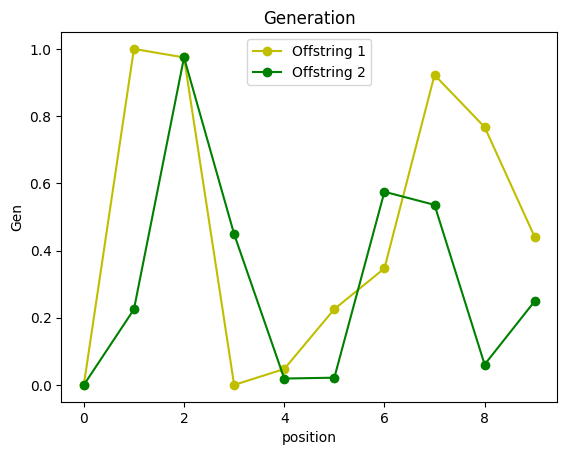

In [10]:
#mutation
mutated = mutation(off1, eta=0.0)

#show
plt.plot(range(len(off1.chromosome)), off1.chromosome, marker='o', linestyle='-', color='y', label='Offstring 1')
plt.plot(range(len(mutated.chromosome)), mutated.chromosome, marker='o', linestyle='-', color='g', label='Offstring 2')

plt.xlabel('position')
plt.ylabel('Gen')
plt.title('Generation')
plt.legend()
plt.show()